In [1]:
"""Explore the behaviour of optimal solution of linear autoencoder for multiple samples."""
import torch
import torch.nn as nn
import torch.optim as optim
from torch import mm, transpose
import matplotlib.pyplot as plt
import numpy as np

In [2]:
class LAE(nn.Module):
    def __init__(self, n, p):
        super(LAE, self).__init__()
        self.n = n
        self.p = p
        self.w1 = nn.Linear(n, p, bias=False)
        self.w2 = nn.Linear(p, n, bias=False)

    def forward(self, y):
        y = self.w1(y)
        y = self.w2(y)
        return y

In [3]:
n = 25
p = 20
m = 100

inputs = torch.rand(m, n)*2
targets = inputs

In [4]:
net = LAE(n, p)

learning_rate = 0.0001
epochs = 10000
counter = 1000
params = list(net.parameters())
criterion = nn.MSELoss()
optimizer = optim.Adam(params, lr=learning_rate)

In [5]:
loss_plt = []
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = net(inputs)
    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()
    loss_plt.append(loss.item())
    if epoch % counter == 0:
        learning_rate *= 0.95
        optimizer = optim.Adam(params, lr=learning_rate)
        print('epoch: ', epoch, 'loss: ', loss.item())

epoch:  0 loss:  1.5320738554000854
epoch:  1000 loss:  0.2883506715297699
epoch:  2000 loss:  0.13551951944828033
epoch:  3000 loss:  0.056992676109075546
epoch:  4000 loss:  0.032523997128009796
epoch:  5000 loss:  0.029237475246191025
epoch:  6000 loss:  0.02879430539906025
epoch:  7000 loss:  0.02871590293943882
epoch:  8000 loss:  0.028707092627882957
epoch:  9000 loss:  0.028706539422273636


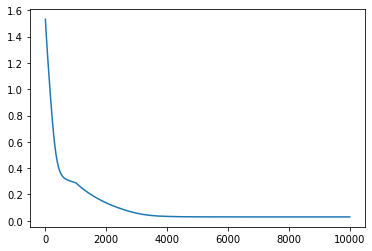

In [6]:
plt.plot(loss_plt)

In [7]:
print(params)

[Parameter containing:
tensor([[ 0.5264,  0.2372, -0.0734, -0.3236, -0.1304, -0.0542,  0.1599,  0.1967,
          0.2510, -0.0511,  0.1184, -0.0980, -0.0622, -0.2523, -0.1728,  0.0830,
          0.2359, -0.2179, -0.0546,  0.2159,  0.0915, -0.2478,  0.1683,  0.1917,
          0.3311],
        [-0.1783,  0.1680, -0.1484, -0.2706,  0.1501,  0.3023,  0.2008, -0.1319,
          0.0934, -0.1594,  0.1234, -0.0392, -0.2700,  0.1618,  0.4171, -0.0066,
          0.2762,  0.2046,  0.2099, -0.2421,  0.1251, -0.0334, -0.2464,  0.0236,
          0.2166],
        [-0.1339, -0.1601,  0.3250, -0.1958, -0.0127,  0.0966, -0.1093,  0.0055,
          0.2519,  0.1441,  0.4210,  0.1229, -0.2250, -0.0463, -0.2128, -0.1986,
          0.0014, -0.2327,  0.3345, -0.1961,  0.2448,  0.1645,  0.0998,  0.1941,
         -0.0614],
        [-0.1231,  0.1468, -0.1898,  0.1691,  0.1360,  0.2384, -0.1467,  0.2057,
         -0.0633,  0.2658,  0.0532, -0.0835,  0.2305,  0.1865,  0.2226,  0.0627,
          0.0793, -0.2206,  0

In [8]:
W1 = params[0].requires_grad_(False)
W2 = params[1].requires_grad_(False)

In [9]:
W1.size()

torch.Size([20, 25])